<a href="https://colab.research.google.com/github/vinay-gowda/Machine-learning-Linear-Regression-analysis-on-Cardekho-data/blob/main/Self_Project_Linear_Regression_(Car_Dekho).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## <b> CarDekho.com is India's leading car search venture that helps users buy cars that are right for them. Its website and app carry rich automotive content such as expert reviews, detailed specs and prices, comparisons as well as videos and pictures of all car brands and models available in India. The company has tie-ups with many auto manufacturers, more than 4000 car dealers and numerous financial institutions to facilitate the purchase of vehicles.

## <b> CarDekho.com has launched many innovative features to ensure that users get an immersive experience of the car model before visiting a dealer showroom. These include a Feel The Car tool that gives 360-degree interior/exterior views with sounds of the car and explanations of features with videos; search and comparison by make, model, price, features; and live offers and promotions in all cities. The platform also has used car classifieds wherein users can upload their cars for sale, and find used cars for buying from individuals and used car dealers.

## <b> Besides the above consumer product features, CarDekho.com provides a rich array of tech-enabled tools to OE manufacturers and car dealers. These include apps for dealer sales executives to manage leads, cloud services for tracking sales performance, call tracker solution, digital marketing support, virtual online showroom and outsourced lead management operational process for taking consumers from enquiry to sale.

## <b> Our vision is to construct a complete ecosystem for consumers and car manufacturers, dealers and related businesses such that consumers have easy and complete access to not only buying and selling cars, but also manage their entire ownership experience, be it accessories, tyres, batteries, insurance or roadside assistance. </b>

## <b>In this project, the dataset contains information about used cars listed on www.cardekho.com. This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.</b>

## <b>The columns in the given dataset are as follows:</b>

- ### name
- ### year
- ### selling_price
- ### km_driven
- ### fuel
- ### seller_type
- ### transmission
- ### Owner

## <b>Load up this dataset in the kernel and perform initial exploratory data analysis (EDA). You should also try creating new features based on the existing ones. The dependent variable is the <code>selling_price</code>. 

## <b> Your task is to build a linear regression model on this dataset (always split into train and test). Evaluate the fitted model on test data using different regression metrics. Also use your linear regression model from <code>statsmodels.api</code> to run a similar regression and obtain parameter inferences for each of the model variables. Next, you need to try if regularizing your model helps you perform well on the test dataset. For this, use <code> Ridge</code> and <code>Lasso</code> regressions on the dataset and check for different values of the tuning parameter ($\lambda$ or $\alpha$ , do not confuse this $\alpha$ with the learning rate.) For each of the above regressions, get the feature importances using the regression coefficients.

## <b><u> Few things to keep in mind :</u>
* ### You should take care of categorical variables (variables which take discrete categories or classes) and do one-hot encoding to be able to pass them into the model.
* ### Try to include as many plots and charts you can. This adds for a great visual interpretation of your tasks/activities.
* ### Write detailed explanation of your approaches in the notebook and once you have some results, try to provide explanations for these observed results. Remember our objective is not only to build a machine learning model but to be able to explain why, what and how of the entire modeling process.

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/ALMABETTER/ASSIGNMENTS/MODULE 4/W1/SELF PROJECT - CAR DEKHO/Copy of CAR DETAILS FROM CAR DEKHO.csv')

In [ ]:
dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


#Data set information



1.   name : Name of car ( Categorical data )
2.   year : Year of manufacture ( Numerical data )
3.   selling_price : Selling price of car ( Numerical data)
4.   km_driven : Kilometers driven by car ( Numerical data)
5.   fuel : Fuel type ( Categorical data )
6.   seller_type : Type of seller ( Categorical data )
7.   transmission : Type of transmission ( Categorical data )
8.   owner : Number of owners changed so far ( Categorical data )



In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
# No NaN values are present in the data
# check for duplicate rows
len(dataset[dataset.duplicated()])

763

In [ ]:
df_cardekho = dataset[["name", "year", "km_driven", "fuel", "seller_type", "transmission", "owner", "selling_price"]].copy()

In [ ]:
# Removing duplicate rows which has same name

df_cardekho.drop_duplicates(keep = False, inplace = True)

In [ ]:
df_cardekho.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3051 entries, 26 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           3051 non-null   object
 1   year           3051 non-null   int64 
 2   km_driven      3051 non-null   int64 
 3   fuel           3051 non-null   object
 4   seller_type    3051 non-null   object
 5   transmission   3051 non-null   object
 6   owner          3051 non-null   object
 7   selling_price  3051 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 214.5+ KB


In [ ]:
len(df_cardekho[dataset.duplicated()])

0

# Exploratory Data Analysis

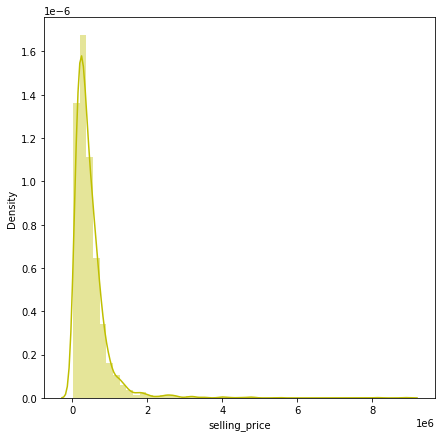

In [ ]:
# Dependent variable 'selling_price'
plt.figure(figsize=(7,7))
sns.distplot(df_cardekho['selling_price'],color="y")

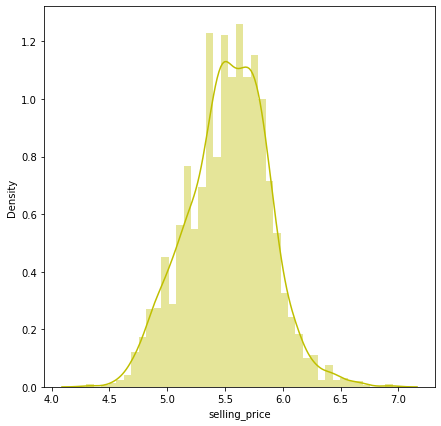

In [ ]:
# Dependent variable 'selling_price'
plt.figure(figsize=(7,7))
sns.distplot(np.log10(df_cardekho['selling_price']),color="y")

In [ ]:
# Log 10 selling price looks like normal distributed.

In [ ]:
numeric_features = df_cardekho.describe().columns
numeric_features

Index(['year', 'km_driven', 'selling_price'], dtype='object')

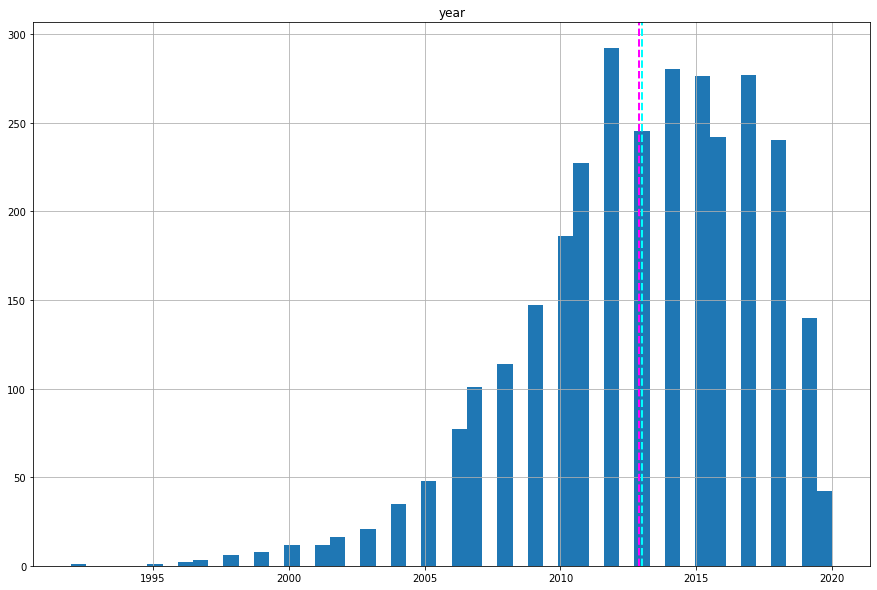

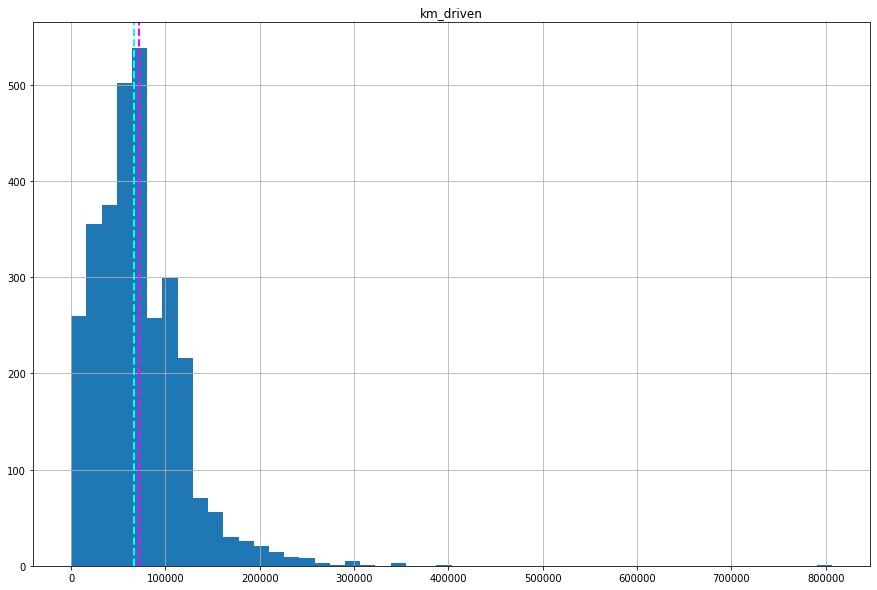

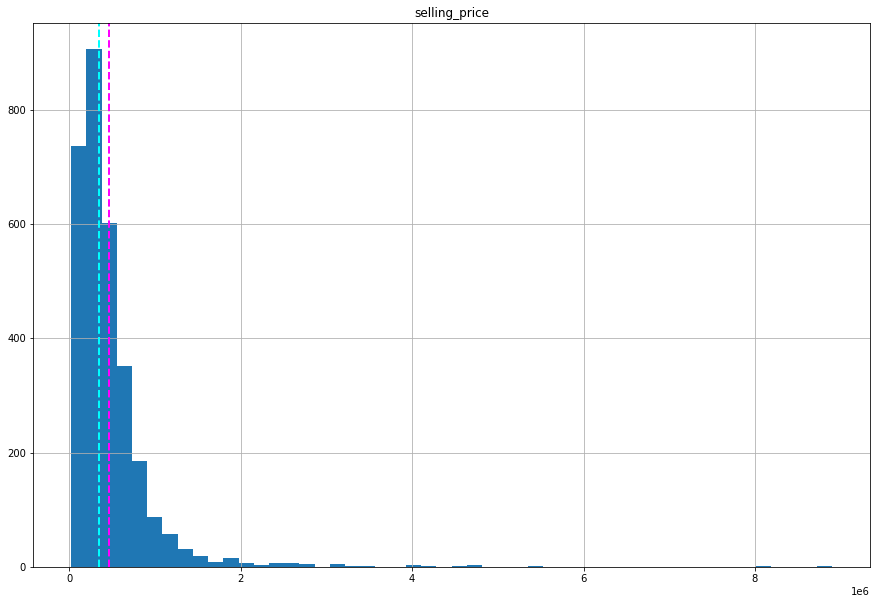

In [ ]:
#@title Default title text
# plot a bar plot for each numerical feature count

for col in numeric_features:
    fig = plt.figure(figsize=(15, 10))
    ax = fig.gca()
    feature = df_cardekho[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

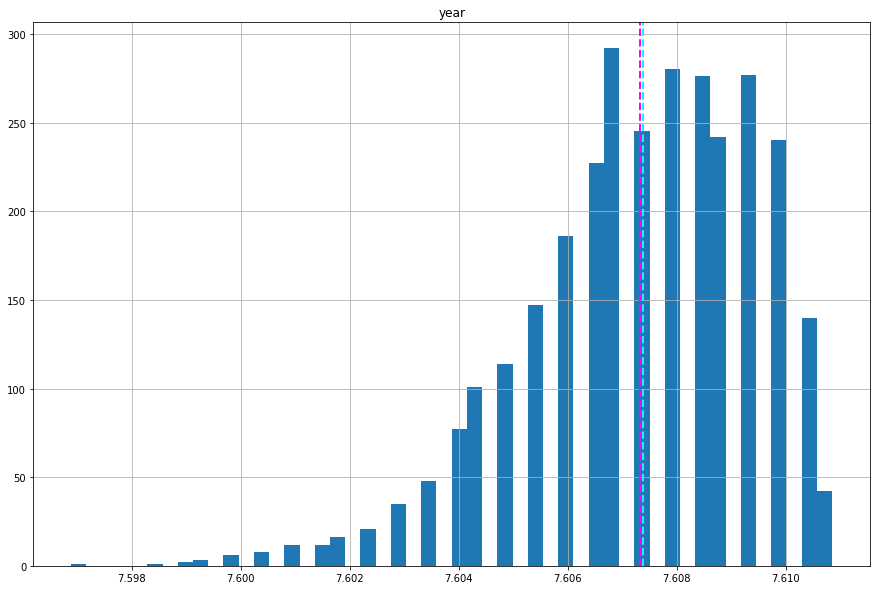

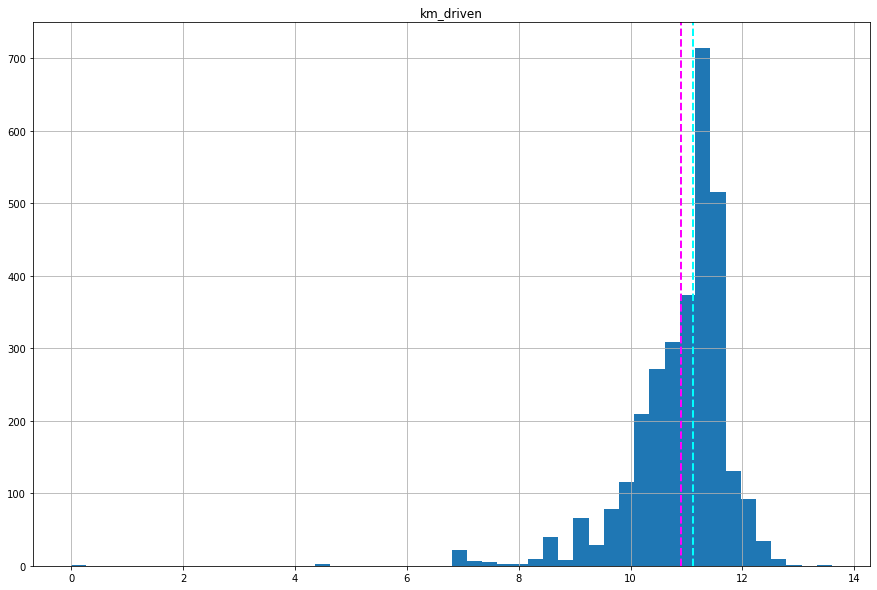

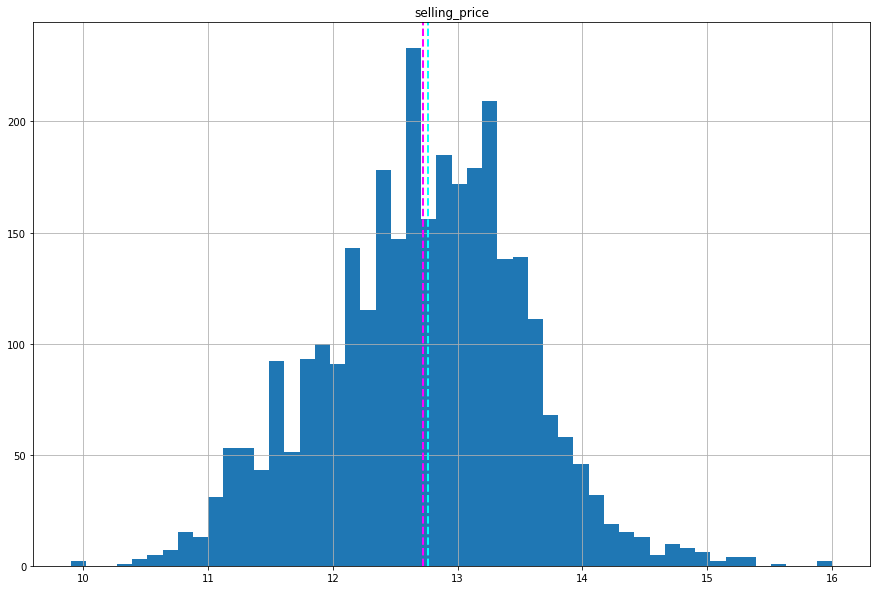

In [ ]:
for col in numeric_features:
    fig = plt.figure(figsize=(15, 10))
    ax = fig.gca()
    feature = np.log(df_cardekho[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

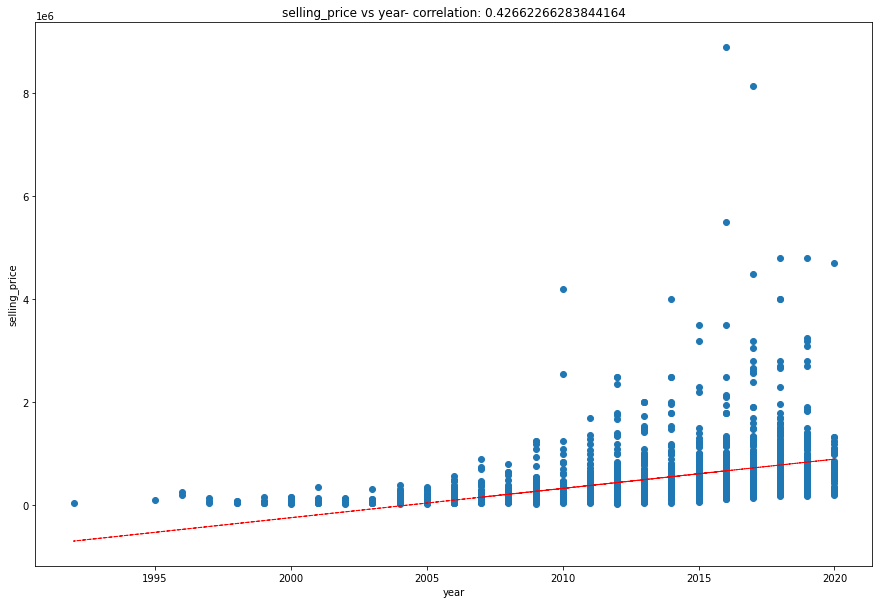

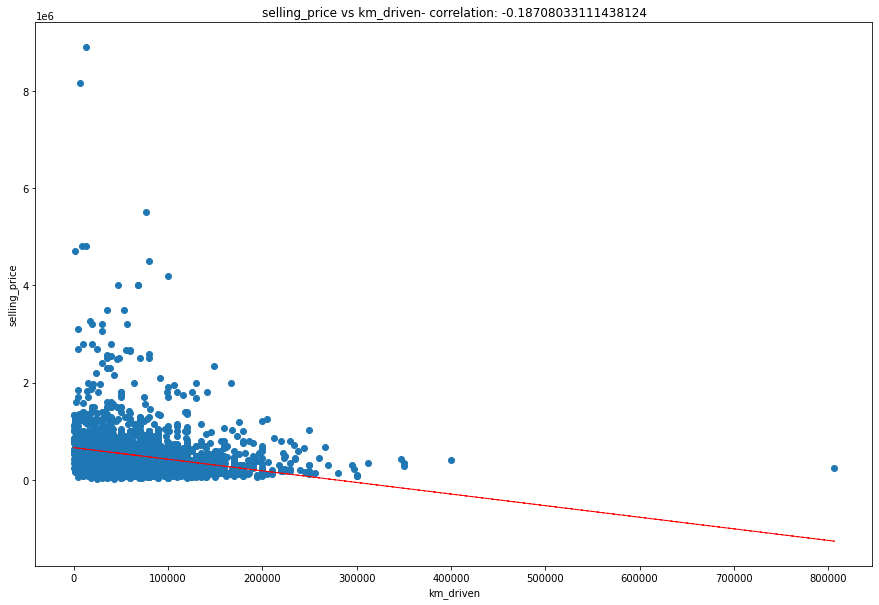

In [ ]:
# finding correlation between DV('selling_price') and IV

for col in numeric_features[:-1]:
    fig = plt.figure(figsize=(15, 10))
    ax = fig.gca()
    feature = df_cardekho[col]
    label = df_cardekho['selling_price']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('selling_price')
    ax.set_title('selling_price vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(dataset[col], dataset['selling_price'], 1)
    y_hat = np.poly1d(z)(dataset[col])

    plt.plot(dataset[col], y_hat, "r--", lw=1)

plt.show()

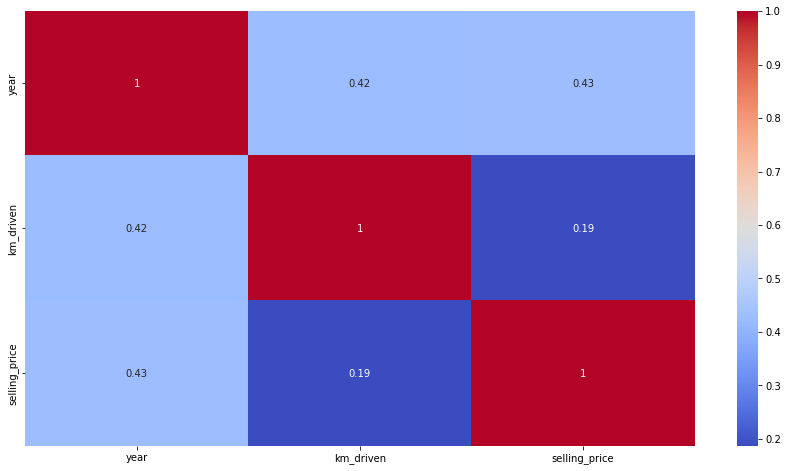

In [ ]:
 ## Correlation plot
plt.figure(figsize=(15,8))
correlation = df_cardekho.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [ ]:
#Multicollinearity handling
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(df_cardekho[[i for i in df_cardekho.describe().columns if i not in ['selling_price']]])

,variables,VIF
0,year,3.212618
1,km_driven,3.212618


In [ ]:
# Since the VIF value is less (<5) we consider it as no multicollinearity b/w the numerical features
numerical_features = ['year','km_driven']

In [ ]:
df_cardekho['name'].unique()

array(['Maruti Ciaz VXi Plus', 'Hyundai Venue SX Opt Diesel',
       'Chevrolet Enjoy TCDi LTZ 7 Seater', ...,
       'Tata Manza Aura Safire BS IV',
       'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV',
       'Hyundai i20 Magna 1.4 CRDi'], dtype=object)

In [ ]:
# list of car company name
df_cardekho['company'] = df_cardekho['name'].str.split(" ", expand=True)[0]
df_cardekho['company'] = df_cardekho['company'].replace({'Land': 'Land_rover'})
df_cardekho['company'] = df_cardekho['company'].str.title()
df_cardekho['company'].value_counts()


Maruti           931
Hyundai          521
Mahindra         294
Tata             260
Ford             204
Honda            186
Toyota           145
Chevrolet        126
Renault           88
Volkswagen        80
Nissan            40
Skoda             40
Fiat              27
Datsun            22
Audi              21
Bmw               20
Mercedes-Benz     16
Land_Rover         5
Mitsubishi         4
Jaguar             4
Volvo              4
Jeep               3
Mg                 2
Opelcorsa          2
Ambassador         2
Daewoo             1
Force              1
Isuzu              1
Kia                1
Name: company, dtype: int64

In [ ]:
df_cardekho.head(5)

,name,year,km_driven,fuel,seller_type,transmission,owner,selling_price,company
26,Maruti Ciaz VXi Plus,2015,24000,Petrol,Dealer,Manual,First Owner,585000,Maruti
27,Hyundai Venue SX Opt Diesel,2019,5000,Diesel,Dealer,Manual,First Owner,1195000,Hyundai
28,Chevrolet Enjoy TCDi LTZ 7 Seater,2013,33000,Diesel,Individual,Manual,Second Owner,390000,Chevrolet
29,Jaguar XF 2.2 Litre Luxury,2014,28000,Diesel,Dealer,Automatic,First Owner,1964999,Jaguar
30,Mercedes-Benz New C-Class 220 CDI AT,2013,59000,Diesel,Dealer,Automatic,First Owner,1425000,Mercedes-Benz


In [ ]:
categorical_features = dataset.describe(include=['object','category']).columns
categorical_features

Index(['name', 'fuel', 'seller_type', 'transmission', 'owner'], dtype='object')

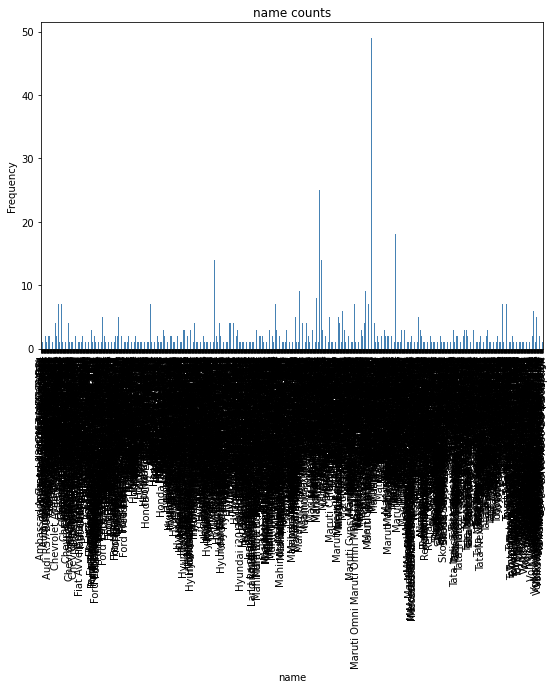

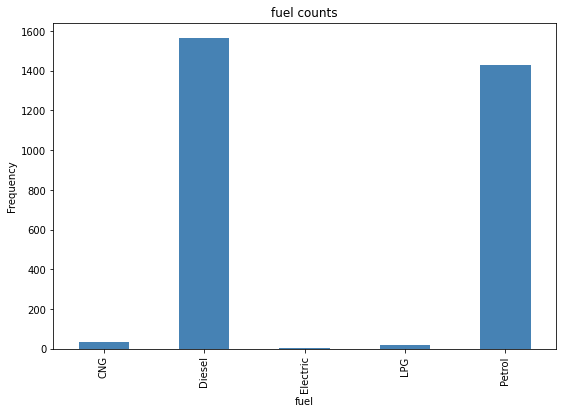

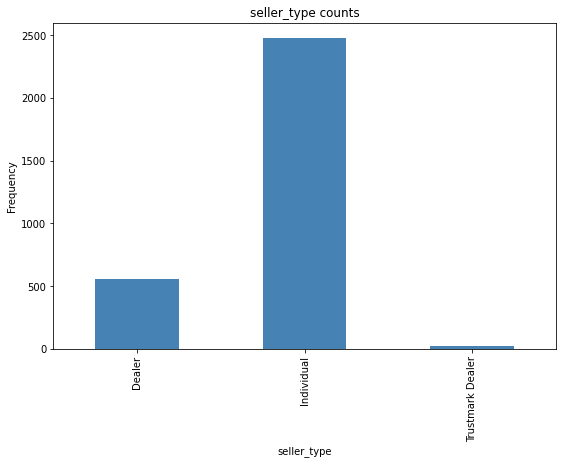

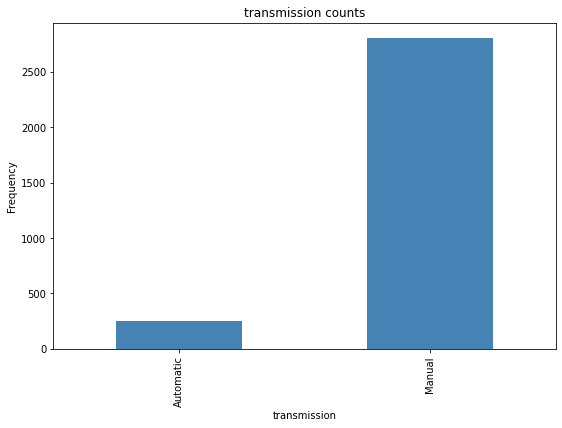

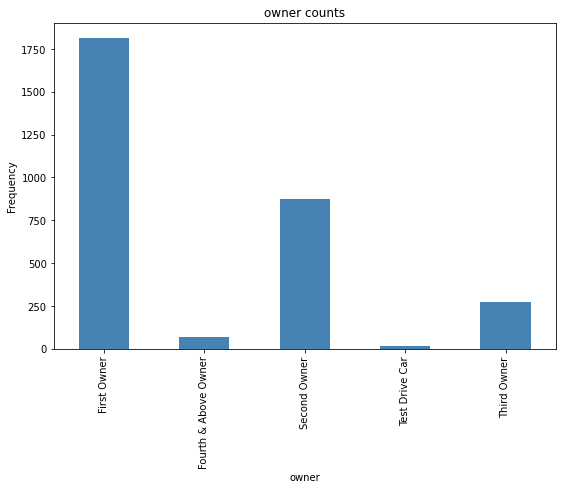

In [ ]:
for col in categorical_features:
    counts = df_cardekho[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

In [ ]:
df_cardekho["owner"].value_counts()

First Owner             1813
Second Owner             876
Third Owner              275
Fourth & Above Owner      70
Test Drive Car            17
Name: owner, dtype: int64

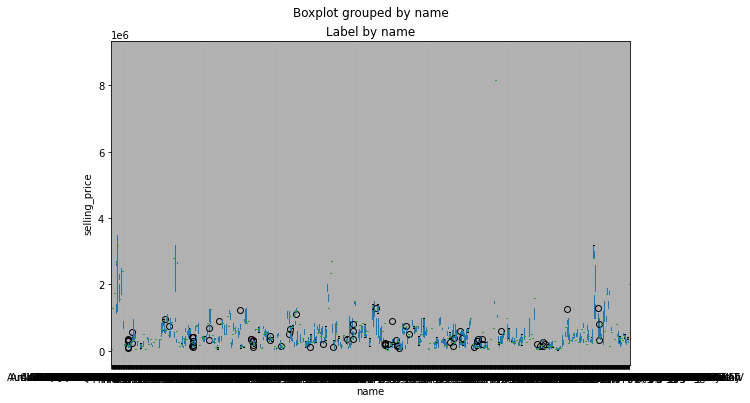

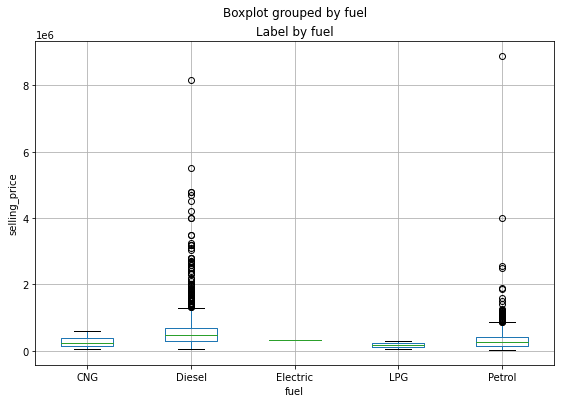

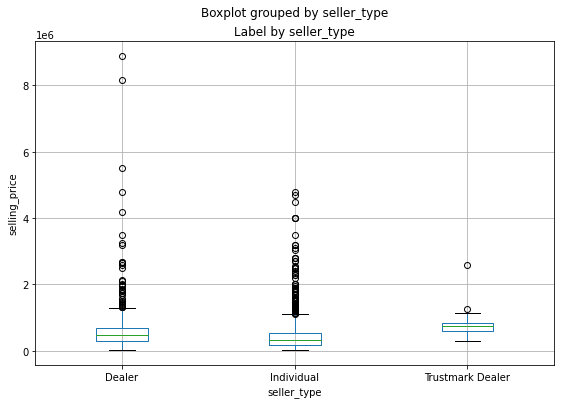

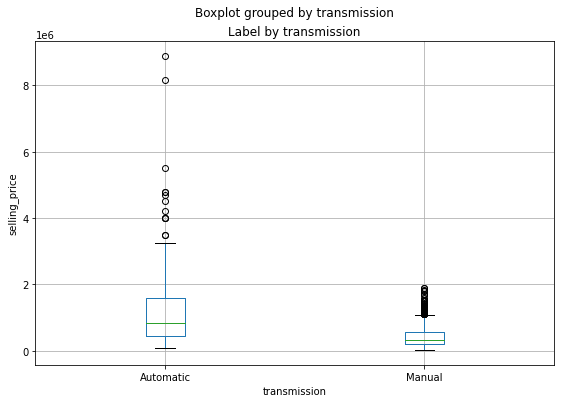

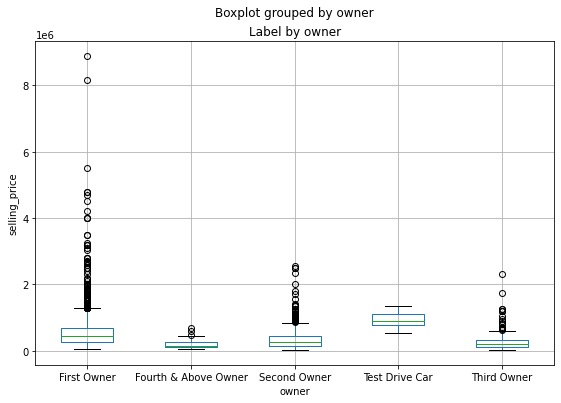

In [ ]:
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    df_cardekho.boxplot(column = 'selling_price', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("selling_price")
plt.show()

In [ ]:
df_cardekho

,name,year,km_driven,fuel,seller_type,transmission,owner,selling_price,company
26,Maruti Ciaz VXi Plus,2015,24000,Petrol,Dealer,Manual,First Owner,585000,Maruti
27,Hyundai Venue SX Opt Diesel,2019,5000,Diesel,Dealer,Manual,First Owner,1195000,Hyundai
28,Chevrolet Enjoy TCDi LTZ 7 Seater,2013,33000,Diesel,Individual,Manual,Second Owner,390000,Chevrolet
29,Jaguar XF 2.2 Litre Luxury,2014,28000,Diesel,Dealer,Automatic,First Owner,1964999,Jaguar
30,Mercedes-Benz New C-Class 220 CDI AT,2013,59000,Diesel,Dealer,Automatic,First Owner,1425000,Mercedes-Benz
...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,80000,Diesel,Individual,Manual,Second Owner,409999,Hyundai
4336,Hyundai i20 Magna 1.4 CRDi,2014,80000,Diesel,Individual,Manual,Second Owner,409999,Hyundai
4337,Maruti 800 AC BSIII,2009,83000,Petrol,Individual,Manual,Second Owner,110000,Maruti
4338,Hyundai Creta 1.6 CRDi SX Option,2016,90000,Diesel,Individual,Manual,First Owner,865000,Hyundai


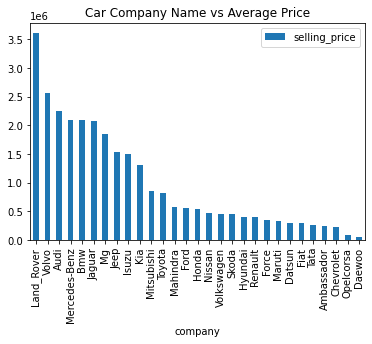

In [ ]:
df_autox = pd.DataFrame(df_cardekho.groupby(['company'])['selling_price'].mean().sort_values(ascending = False))
df_autox.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()

In [ ]:
df_cardekho.groupby(['company'])['selling_price'].mean().sort_values(ascending = False)

company
Land_Rover       3.609800e+06
Volvo            2.556250e+06
Audi             2.242857e+06
Mercedes-Benz    2.099062e+06
Bmw              2.091000e+06
Jaguar           2.078750e+06
Mg               1.842500e+06
Jeep             1.530000e+06
Isuzu            1.500000e+06
Kia              1.300000e+06
Mitsubishi       8.475000e+05
Toyota           8.240689e+05
Mahindra         5.818809e+05
Ford             5.554558e+05
Honda            5.438064e+05
Nissan           4.683999e+05
Volkswagen       4.525500e+05
Skoda            4.487000e+05
Hyundai          4.095201e+05
Renault          3.968068e+05
Force            3.460000e+05
Maruti           3.312069e+05
Datsun           2.936363e+05
Fiat             2.921111e+05
Tata             2.690542e+05
Ambassador       2.400000e+05
Chevrolet        2.267515e+05
Opelcorsa        8.850000e+04
Daewoo           6.000000e+04
Name: selling_price, dtype: float64

In [ ]:
df_autox.rename(columns={'selling_price':'price_mean'},inplace=True)

In [ ]:
df_cardekho = df_cardekho.merge(df_autox,on = 'company',how = 'left')

In [ ]:
df_cardekho

,name,year,km_driven,fuel,seller_type,transmission,owner,selling_price,company,price_mean
0,Maruti Ciaz VXi Plus,2015,24000,Petrol,Dealer,Manual,First Owner,585000,Maruti,3.312069e+05
1,Hyundai Venue SX Opt Diesel,2019,5000,Diesel,Dealer,Manual,First Owner,1195000,Hyundai,4.095201e+05
2,Chevrolet Enjoy TCDi LTZ 7 Seater,2013,33000,Diesel,Individual,Manual,Second Owner,390000,Chevrolet,2.267515e+05
3,Jaguar XF 2.2 Litre Luxury,2014,28000,Diesel,Dealer,Automatic,First Owner,1964999,Jaguar,2.078750e+06
4,Mercedes-Benz New C-Class 220 CDI AT,2013,59000,Diesel,Dealer,Automatic,First Owner,1425000,Mercedes-Benz,2.099062e+06
...,...,...,...,...,...,...,...,...,...,...
3046,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,80000,Diesel,Individual,Manual,Second Owner,409999,Hyundai,4.095201e+05
3047,Hyundai i20 Magna 1.4 CRDi,2014,80000,Diesel,Individual,Manual,Second Owner,409999,Hyundai,4.095201e+05
3048,Maruti 800 AC BSIII,2009,83000,Petrol,Individual,Manual,Second Owner,110000,Maruti,3.312069e+05
3049,Hyundai Creta 1.6 CRDi SX Option,2016,90000,Diesel,Individual,Manual,First Owner,865000,Hyundai,4.095201e+05


In [ ]:
# catagorize the cars as 0, 1, or 2 as cheap, moderate and expensive cars based on their selling price. (selling price < 4,00,000 Rs = cheap ; 4,00,000 Rs < selling price < 15,00,000 Rs = moderate ; selling price < 15,00,000 Rs = expensive  )
df_cardekho['company_cat'] = df_cardekho['price_mean'].apply(lambda x : 0 if x < 4e+05 else (1 if 4e+05 <= x < 15e+05 else 2))

In [ ]:
df_cardekho["company_cat"].value_counts()

1    1515
0    1460
2      76
Name: company_cat, dtype: int64

In [ ]:
correlation.selling_price

year             0.426623
km_driven       -0.187080
selling_price    1.000000
Name: selling_price, dtype: float64

In [ ]:
df_cardekho_cor = df_cardekho.copy()

In [ ]:
df_cardekho.describe(include=['object','category']).columns

Index(['name', 'fuel', 'seller_type', 'transmission', 'owner', 'company'], dtype='object')

In [ ]:
df_cardekho_cor.company.value_counts()

Maruti           931
Hyundai          521
Mahindra         294
Tata             260
Ford             204
Honda            186
Toyota           145
Chevrolet        126
Renault           88
Volkswagen        80
Nissan            40
Skoda             40
Fiat              27
Datsun            22
Audi              21
Bmw               20
Mercedes-Benz     16
Land_Rover         5
Mitsubishi         4
Jaguar             4
Volvo              4
Jeep               3
Mg                 2
Opelcorsa          2
Ambassador         2
Daewoo             1
Force              1
Isuzu              1
Kia                1
Name: company, dtype: int64

In [ ]:
### Data encoding
#label encoding

# fuel (diesel = 0, petrol = 1, other = 2)
# company (top 10 companies = 0-8, remaining all : other = 9)


encoders_nums = {"fuel":{"Diesel":0,"Petrol":1,"CNG":2, "LPG":2, "Electric":2},
                 "transmission":{"Manual":1,"Automatic":0},
                 "owner":{"First Owner": 1, "Second Owner": 2, "Third Owner": 3, "Fourth & Above Owner": 4,
                                  "Test Drive Car": 10},
                 "company":{"Maruti": 1, "Hyundai": 2, "Mahindra": 3, "Tata": 4, "Ford": 5, "Honda": 6, 
                            "Toyota": 7, "Chevrolet": 8, "Renault": 9, "Volkswagen": 9, "Nissan": 9, "Skoda": 9, 
                            "Fiat": 9, "Datsun": 9, "Renault": 9, "Audi": 9, "Bmw": 9, "Mercedes-Benz": 9,
                            "Land_Rover": 9, "Mitsubishi": 9, "Jaguar": 9, "Volvo": 9, "Jeep": 9, "Mg": 9,
                            "Opelcorsa": 9, "Ambassador": 9, "Daewoo": 9, "Force": 9, "Isuzu": 9, "Kia": 9,
                            }
                 }

df_cardekho_cor = df_cardekho_cor.replace(encoders_nums)

In [ ]:
# One hot encoding
df_cardekho_cor = pd.get_dummies(df_cardekho_cor, columns=["seller_type"], prefix=["seltype"])

In [ ]:
df_cardekho_cor

,name,year,km_driven,fuel,transmission,owner,selling_price,company,price_mean,company_cat,seltype_Dealer,seltype_Individual,seltype_Trustmark Dealer
0,Maruti Ciaz VXi Plus,2015,24000,1,1,1,585000,1,3.312069e+05,0,1,0,0
1,Hyundai Venue SX Opt Diesel,2019,5000,0,1,1,1195000,2,4.095201e+05,1,1,0,0
2,Chevrolet Enjoy TCDi LTZ 7 Seater,2013,33000,0,1,2,390000,8,2.267515e+05,0,0,1,0
3,Jaguar XF 2.2 Litre Luxury,2014,28000,0,0,1,1964999,9,2.078750e+06,2,1,0,0
4,Mercedes-Benz New C-Class 220 CDI AT,2013,59000,0,0,1,1425000,9,2.099062e+06,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3046,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,80000,0,1,2,409999,2,4.095201e+05,1,0,1,0
3047,Hyundai i20 Magna 1.4 CRDi,2014,80000,0,1,2,409999,2,4.095201e+05,1,0,1,0
3048,Maruti 800 AC BSIII,2009,83000,1,1,2,110000,1,3.312069e+05,0,0,1,0
3049,Hyundai Creta 1.6 CRDi SX Option,2016,90000,0,1,1,865000,2,4.095201e+05,1,0,1,0


In [ ]:
df_cardekho_cor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3051 entries, 0 to 3050
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      3051 non-null   object 
 1   year                      3051 non-null   int64  
 2   km_driven                 3051 non-null   int64  
 3   fuel                      3051 non-null   int64  
 4   transmission              3051 non-null   int64  
 5   owner                     3051 non-null   int64  
 6   selling_price             3051 non-null   int64  
 7   company                   3051 non-null   int64  
 8   price_mean                3051 non-null   float64
 9   company_cat               3051 non-null   int64  
 10  seltype_Dealer            3051 non-null   uint8  
 11  seltype_Individual        3051 non-null   uint8  
 12  seltype_Trustmark Dealer  3051 non-null   uint8  
dtypes: float64(1), int64(8), object(1), uint8(3)
memory usage: 271.

In [ ]:
features = df_cardekho_cor.describe().columns
features

Index(['year', 'km_driven', 'fuel', 'transmission', 'owner', 'selling_price',
       'company', 'price_mean', 'company_cat', 'seltype_Dealer',
       'seltype_Individual', 'seltype_Trustmark Dealer'],
      dtype='object')

In [ ]:
len(features)

12

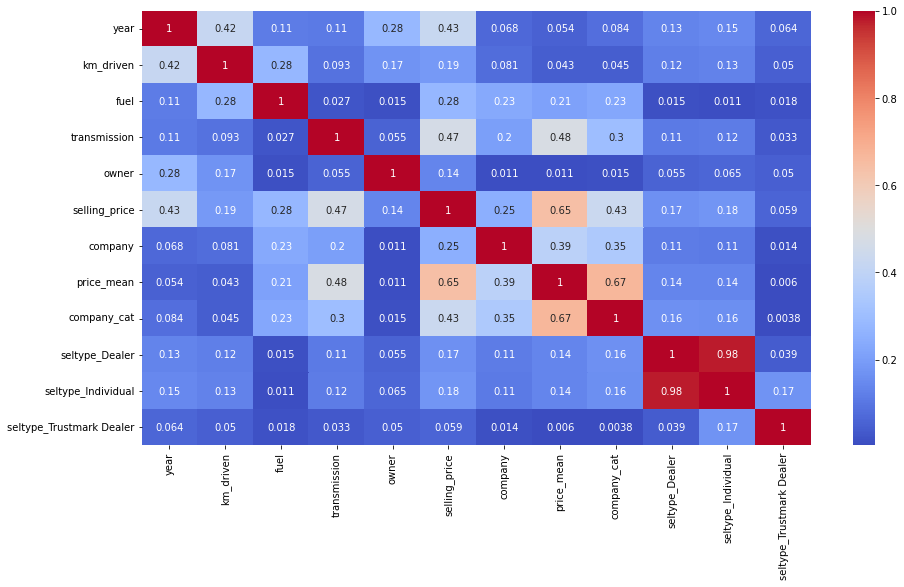

In [ ]:
 ## Correlation plot
plt.figure(figsize=(15,8))
correlation = df_cardekho_cor.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

# LR model making

In [ ]:
from scipy.stats import zscore
#Train test split
X = df_cardekho_cor[features].apply(zscore)

In [ ]:
y = np.log10(df_cardekho_cor['selling_price'])

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(2440, 12)
(611, 12)


In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [ ]:
reg.score(X_train, y_train)

0.8279114736609361

In [ ]:
reg.coef_

array([ 1.70979573e-01,  1.07823521e-02, -6.04894794e-02, -1.14168330e-02,
       -9.37302604e-03,  1.47355813e-01, -8.00644522e-03,  6.87997865e-04,
        5.66330244e-02, -2.78158512e+12, -2.82187286e+12, -5.96566912e+11])

In [ ]:
len(reg.coef_)

12

In [ ]:
reg.intercept_

5.523747449113267

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
y_pred

array([5.35025017, 5.19129024, 5.77957684, 5.42442098, 5.87371629,
       5.79416342, 5.43879497, 5.73221273, 5.64910918, 5.62157679,
       5.65139819, 5.61894885, 5.77798491, 5.75523456, 5.44105382,
       5.70920498, 5.51211433, 5.58505283, 6.04221129, 5.82363974,
       5.99959514, 5.59242181, 5.17752127, 5.61868685, 5.76061769,
       5.91991908, 5.57684737, 5.55807349, 5.564487  , 5.75815367,
       5.55032445, 6.01646869, 5.57054208, 5.13933283, 5.79868265,
       5.38900023, 5.53243959, 5.25345116, 5.12053672, 5.68629841,
       5.47797742, 5.63648578, 5.65445656, 5.50120766, 5.15956635,
       5.53210936, 5.96757479, 6.39730596, 5.37268899, 5.44555506,
       5.60977575, 5.72814605, 5.11914889, 4.90676283, 5.32881313,
       5.76046721, 5.39632623, 5.5917026 , 5.06667884, 5.70208813,
       5.41625245, 5.74388452, 5.63402488, 5.57423902, 5.6999159 ,
       5.49409948, 5.92792571, 5.94728609, 6.01702108, 5.35131155,
       5.45311263, 5.54690142, 5.48415333, 5.48170534, 5.44867

In [ ]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 22533676126.87606
RMSE : 150112.21178463817


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(10**(y_test), 10**(y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.8589138416212042
Adjusted R2 :  0.856082681252399


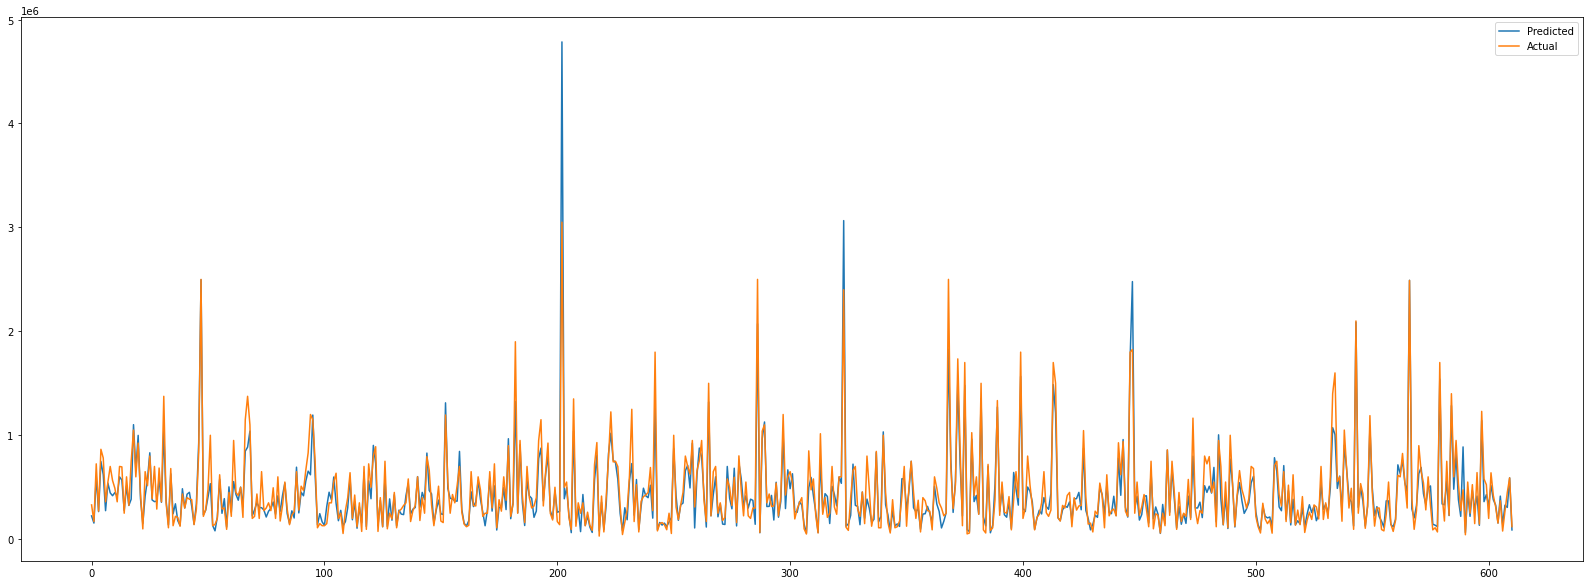

In [ ]:
plt.figure(figsize=(28,10))
plt.plot(10**(y_pred))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0016 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.0016, max_iter=3000)

In [ ]:
lasso.score(X_train, y_train)

0.8277522140170332

In [ ]:
lasso.coef_

array([ 0.16837505,  0.00812893, -0.05974718, -0.00980658, -0.0071999 ,
        0.14889665, -0.00652768,  0.        ,  0.05561673,  0.        ,
       -0.01411737,  0.00341769])

In [ ]:
### Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0016]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0016]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0016}

Using  {'alpha': 0.0016}  the negative mean squared error is:  -0.023213503938558762


In [ ]:
y_pred_lasso = lasso_regressor.predict(X_test)

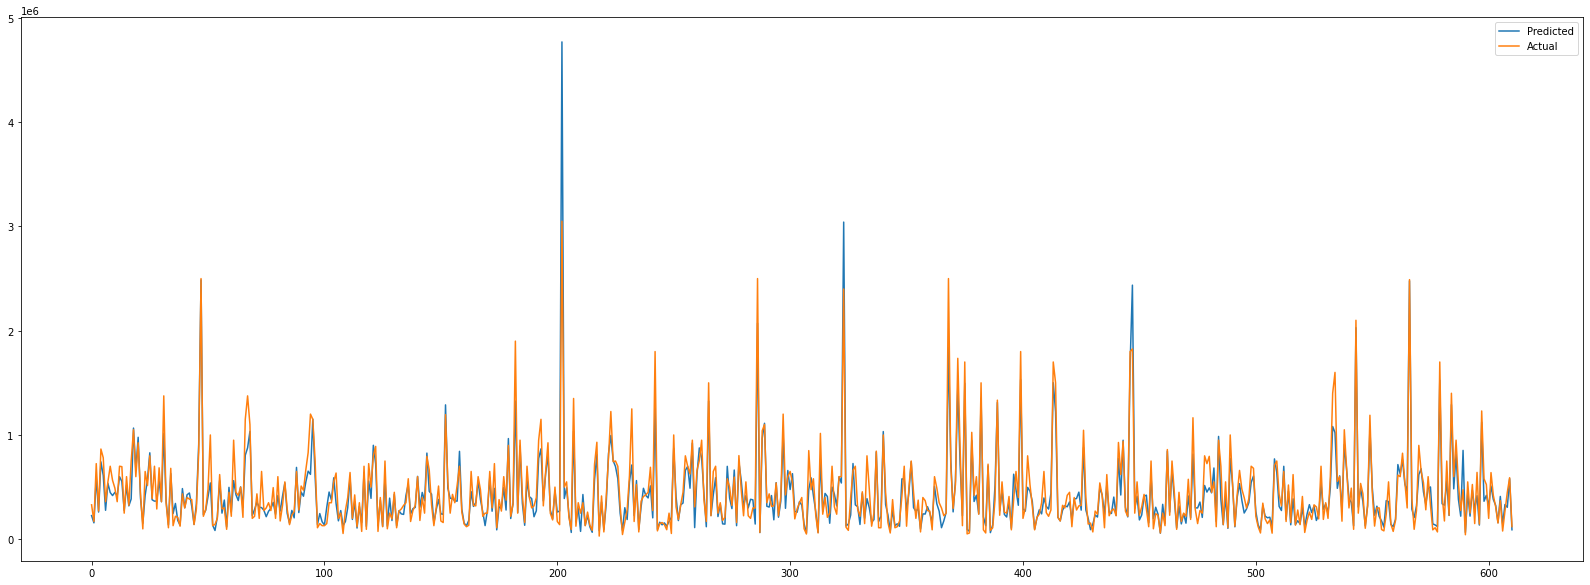

In [ ]:
plt.figure(figsize=(28,10))
plt.plot(10**(y_pred_lasso))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 22438747297.698784
RMSE : 149795.6851771732
R2 : 0.859508202867572
Adjusted R2 :  0.8566889694802993


In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 100}

Using  {'alpha': 100}  the negative mean squared error is:  -0.02260529182474839


In [ ]:
y_pred_ridge = ridge_regressor.predict(X_test)

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 22723326316.801285
RMSE : 150742.58295784003
R2 : 0.8577264181141961
Adjusted R2 :  0.8548714298489292


In [ ]:
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [ ]:
elasticnet.score(X_train, y_train)

0.7697452853345729

In [ ]:
y_pred_en = elasticnet.predict(X_test)

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_en))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_en))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 38464307659.50078
RMSE : 196123.1951083318
R2 : 0.7591701694910535
Adjusted R2 :  0.7543374638621114


In [ ]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01, 'l1_ratio': 0.4}

Using  {'alpha': 0.01, 'l1_ratio': 0.4}  the negative mean squared error is:  -0.023037272796271376


In [ ]:
y_pred_elastic = elastic_regressor.predict(X_test)

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_elastic))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_elastic))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_elastic)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 22334690375.37991
RMSE : 149447.95206151172
R2 : 0.8601597162442634
Adjusted R2 :  0.8573535567040145


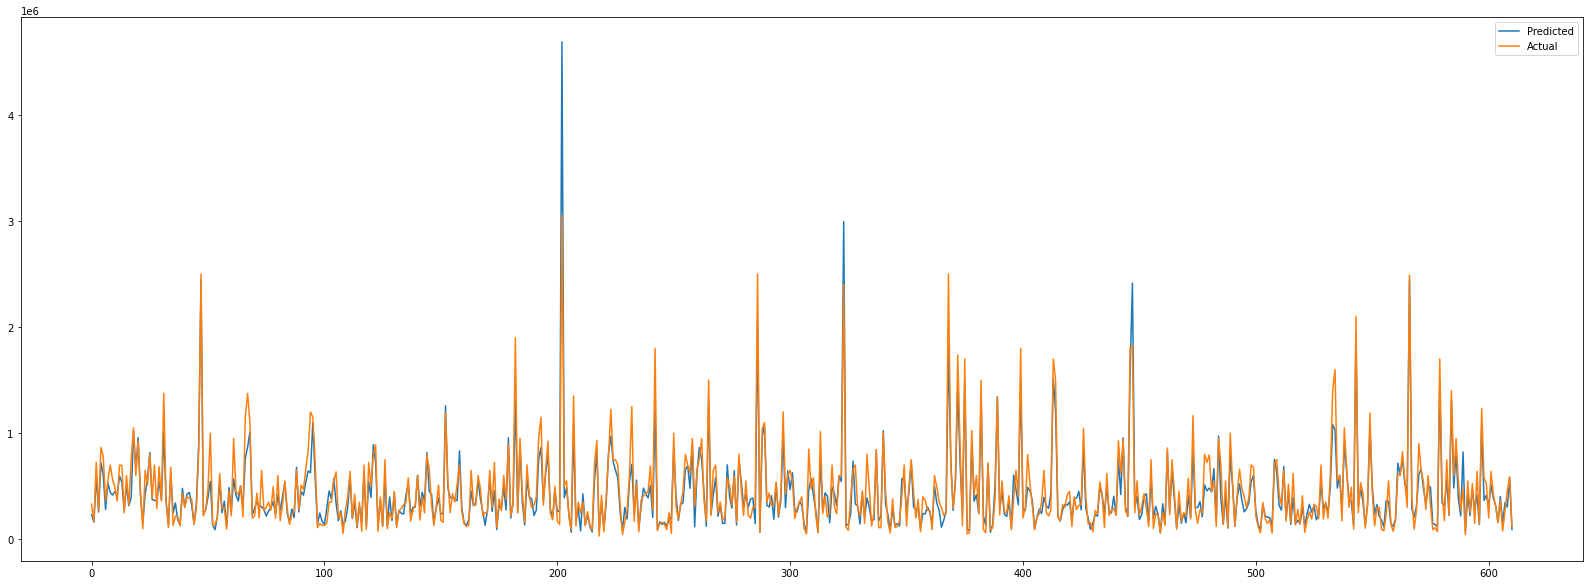

In [ ]:
plt.figure(figsize=(28,10))
plt.plot(10**(y_pred_elastic))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()